In [51]:
from gensim.parsing.preprocessing import preprocess_string
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pickle
import pandas as pd
import plotly.express as px

In [5]:
df = pd.read_csv('./data/dataframe.csv')

In [37]:
df = df.dropna()

In [87]:
df['tokens'] = df['extracts'].apply(preprocess_string)
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['tokens'])]
model = Doc2Vec(documents, vector_size=2, window=5, min_count=2, workers=-2, dm=1)

C:\Users\tally\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
df['x'] = [model.infer_vector(tokens)[0] for tokens in df['tokens']]
df['y'] = [model.infer_vector(tokens)[1] for tokens in df['tokens']]

C:\Users\tally\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tally\Anaconda3\envs\test\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df.to_csv('./data/dataframe.csv')

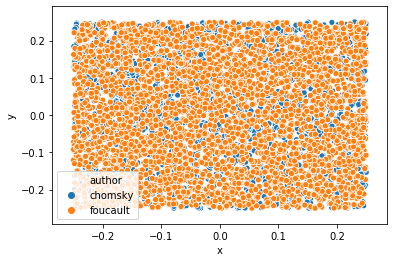

In [90]:
fig = sns.scatterplot(df['x'], df['y'], hue=df['author'])

In [91]:
model.docvecs